max_voted_person
M. GLUCKSMANN Raphaël    120
Mme AUBRY Manon           20
Mme HAYER Valérie          2
M. BARDELLA Jordan         1
Name: count, dtype: int64


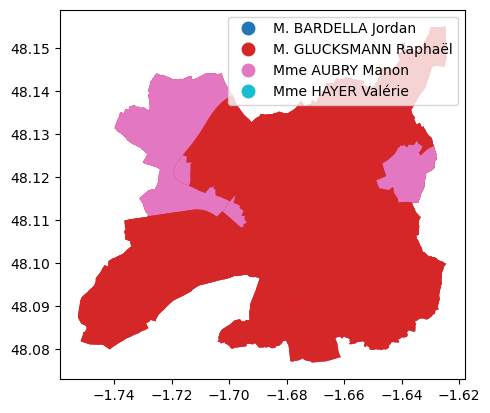

In [46]:
import json
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
import pandas as pd


# Load the JSON file
with open('../data/resultats_rennesmetropole_e24_1.json') as f:
    data = json.load(f)

gdfs = []  # List to store GeoDataFrames

# Iterate over each bureau
for bureau in data:
    max_votes = 0
    person_with_max_votes = ''
    # Check if the bureau is in the city of Rennes
    if bureau['libelle_commune'] == 'Rennes':
        # Iterate over each person in the bureau
        for i in range (1, 39):
            # If this person has more votes than the current max, update the max and the person
            if bureau[f"nb_voix_{i}"] > max_votes:
                max_votes = bureau[f"nb_voix_{i}"]
                person_with_max_votes = bureau[f"candidat_{i}"]
        
        # Check if the necessary data exists
        if bureau["geo_shape"] and bureau["geo_shape"]["geometry"] and bureau["geo_shape"]["geometry"]["coordinates"]:
            
            # Create a GeoDataFrame for this bureau
            coordinates = bureau["geo_shape"]["geometry"]["coordinates"]

            if isinstance(coordinates[0][0][0], list):
                geometry = MultiPolygon(coordinates)
            else:
                geometry = Polygon(coordinates[0])

            bureau["max_voted_person"] = person_with_max_votes
            gdf = gpd.GeoDataFrame(
                [bureau],  # Pass the bureau as a list to create a single-row GeoDataFrame
                geometry=[geometry],  # Pass the geometry as a list
                crs="EPSG:4326",
            )
            gdf['max_voted_person'] = person_with_max_votes
            gdfs.append(gdf)
# Concatenate all GeoDataFrames into one
all_gdf = pd.concat(gdfs)
print(all_gdf["max_voted_person"].value_counts())
fig, ax = plt.subplots(1, 1)

# Plot the combined GeoDataFrame
all_gdf.plot(column='max_voted_person', ax=ax, legend=True)
plt.show()